# Drill: Present the same data multiple ways
Unit 1 / Lesson 3 / Project 3

The best way to learn plotting is to make a lot of plots. To complete the following you may need to explore the seaborn documentation:
http://seaborn.pydata.org/index.html

## Drills
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

- Choose one variable and plot that variable four different ways.
- Choose two continuous variables, and plot them three different ways.
- Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

### Challenge
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = sns.load_dataset('mpg')
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


### Miles Per Gallon Four Ways:

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


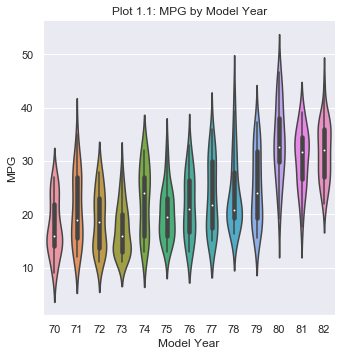

In [2]:
sns.set(style='darkgrid')

g = sns.catplot(y='mpg', x='model_year', data=df, kind='violin')

Title = 'Plot 1.1: MPG by Model Year'
g.set(xlabel='Model Year', ylabel='MPG', title=Title)

plt.show()

Plot 1.1 shows the range of MPG over a decade or so. We can tell from the plot that MPG has been increasing over time, but it's not very easy to read or otherwise informative.

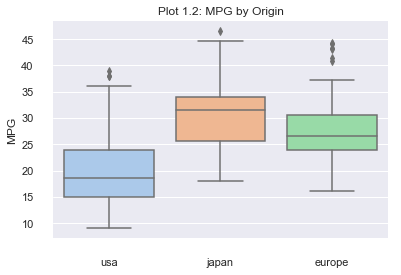

In [3]:
sns.set(style='darkgrid')

ax = sns.boxplot(x='origin', y='mpg', data=df, palette='pastel')
plt.title('Plot 1.2: MPG by Origin')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='MPG')

plt.show()

Plot 1.2 gives us a better idea of ranges of MPG, this time by origin or production. We can see more differentiation between the groups in Plot 1.2 than in the previous plot. But this plot doesn't tell us very much, we can infer Japanese cars have a higher MPG than cars made in the USA and Europe. This plot would be more useful if we had more context.

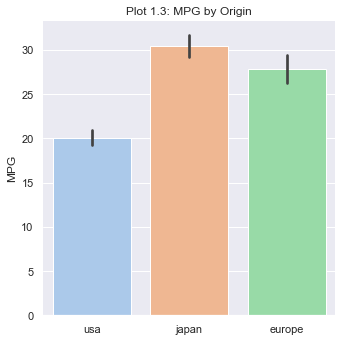

In [4]:
# set the aesthetic
sns.set(style='darkgrid')

g = sns.catplot(x='origin', y='mpg', data=df, height=5, kind='bar', palette='pastel', ci=95)
g.despine(left=True)
g.set(xlabel='', ylabel='MPG')
plt.title('Plot 1.3: MPG by Origin')
plt.show()

Plot 1.3 shows us the ranges in MPG over the three countries of origin, just like the previous plot. It conveys the same information as the box plot, just in a simpler way. The trade off to a clearer depiction of the information is it gives even less perspective on the difference in MPG between the three production region.

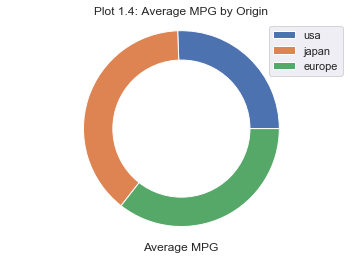

In [5]:
# create data
japan = df['mpg'].loc[(df['origin']=='japan')].mean()
usa = df['mpg'].loc[(df['origin']=='usa')].mean()
euro = df['mpg'].loc[(df['origin']=='europe')].mean()
data_group=[usa,japan,euro]
 
# Create a pieplot
ax = plt.pie(data_group)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('equal')
plt.xlabel('Average MPG')
plt.legend(df['origin'].unique(), loc='upper right')
plt.title('Plot 1.4: Average MPG by Origin')

plt.show()

Plot 1.4 does tell us something and it's easy to read. We can easily compare average MPG by the origin of production. Without any numerical values, though, it's hard to really compare values within a similar range, like Japan and Europe. A pie chart is an unusual way to view anything except counts and sums as a percentage of a whole.

### Horsepower and Engine Weight Two Ways

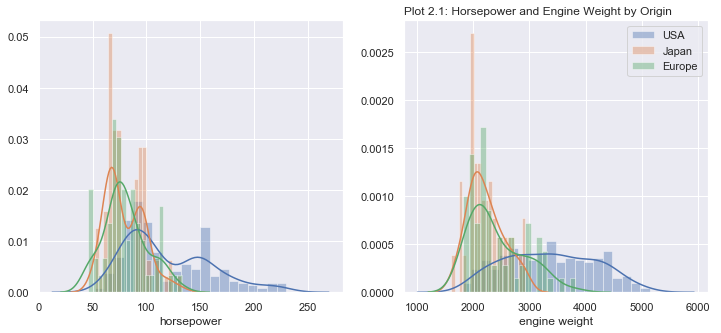

In [6]:
sns.set(style='darkgrid')

usa_hp = df['horsepower'].loc[df['origin']=='usa'].dropna()
japan_hp = df['horsepower'].loc[df['origin']=='japan'].dropna()
euro_hp = df['horsepower'].loc[df['origin']=='europe'].dropna()

usa_w = df['weight'].loc[df['origin']=='usa']
japan_w = df['weight'].loc[df['origin']=='japan']
euro_w = df['weight'].loc[df['origin']=='europe']

f, axes = plt.subplots(1,2, figsize=(12,5))

sns.distplot(usa_hp, bins=20, hist=True, label='USA', ax=axes[0])
sns.distplot(japan_hp, bins=20, hist=True, label='Japan', ax=axes[0])
sns.distplot(euro_hp, bins=20, hist=True, label='Europe', ax=axes[0])

sns.distplot(usa_w, bins=20, hist=True, label='USA', ax=axes[1])
sns.distplot(japan_w, bins=20, hist=True, label='Japan', ax=axes[1])
sns.distplot(euro_w, bins=20, hist=True, label='Europe', ax=axes[1])

plt.title('Plot 2.1: Horsepower and Engine Weight by Origin', loc='left')
plt.xlabel('engine weight')
plt.legend()

plt.show()

Plot 2.1 isn't the easiest chart to read, the groups overlap a little too much and makes for a jumbled image. We can infer that there's a correlation between horsepower and engine weight. We can also see a trend in both engine weight and horsepower based of where the automobile was produced; Japanese cars have much smaller engines than American cars, which come in a much greater ranger of engine size.

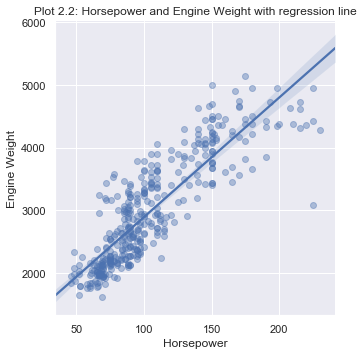

In [7]:
sns.set(style='darkgrid')

g = sns.lmplot(y='weight',
              x='horsepower',
              data=df,
              fit_reg=True,
              scatter_kws={'alpha':0.4})

Title = 'Plot 2.2: Horsepower and Engine Weight with regression line'
g.set(xlabel='Horsepower', ylabel='Engine Weight', title=Title)
plt.show()

In plot 2.2 we can confirm our inference from plot 2.1, there's a positive correlation between horsepower and engine weight. Plot 2.2 clearly shows us this, it's straight foward, easy to read, and informative, but it could be more informative. We could plot more info, such as engine cylinders or origin, to give us more perspective about the different types of engines and how that affects horsepower.

### Miles per Gallon by Country of Origin

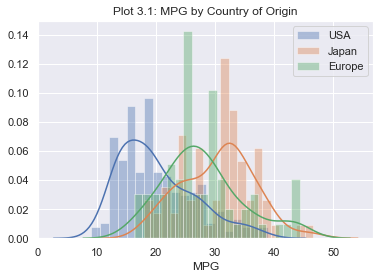

In [8]:
sns.set(style='darkgrid')

usa_mpg = df['mpg'].loc[df['origin']=='usa']
japan_mpg = df['mpg'].loc[df['origin']=='japan']
euro_mpg = df['mpg'].loc[df['origin']=='europe']

sns.distplot(usa_mpg, bins=20, hist=True, label='USA')
sns.distplot(japan_mpg, bins=20, hist=True, label='Japan')
sns.distplot(euro_mpg, bins=20, hist=True, label='Europe')


plt.title('Plot 3.1: MPG by Country of Origin')
plt.xlabel('MPG')
plt.legend()

plt.show()

Plot 3.1 does a great job showing us the distribution of mpg over the regions of production. Like the previous histograms, it's not the easies to read, but we can see Japanese cars tend to have a higher MPG than American cars, and European cars are comfortably in the middle.

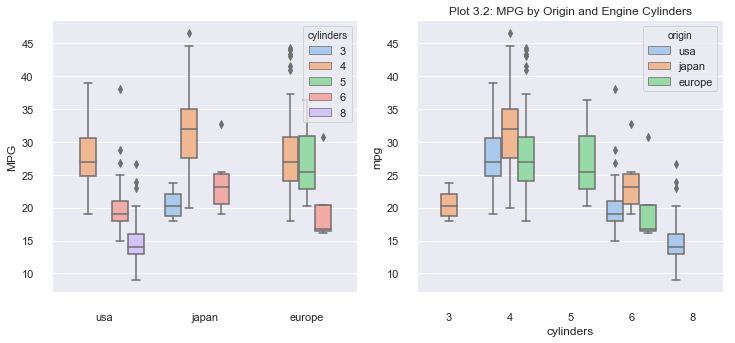

In [9]:
sns.set(style='darkgrid')

f, axes = plt.subplots(1,2, figsize=(12,5))

g = sns.boxplot(x='origin', y='mpg', hue='cylinders', data=df, palette='pastel', ax=axes[0])
h = sns.boxplot(x='cylinders', y='mpg', hue='origin', data=df, palette='pastel', ax=axes[1])

plt.title('Plot 3.2: MPG by Origin and Engine Cylinders')

sns.despine(offset=10, trim=True)
g.set(xlabel='', ylabel='MPG')

plt.show()

Plot 3.2 shows us the same information two ways. Both plots have similar draw backs, they could be easier to read, they cry for summary statistics (what is the total number of japanese 4 cylinder cars vs. american 4 cylinder cars?). We can get a good idea of the distribution of cars by origin and engine cylinders.

We can see that the US is the only producer making cars with 8 cylinder engines. We can see that most European cars are either four or five cylinder. We can see that yes, Japanese cars are more fuel efficient, but that comes at a large range. If we look closesly at the second chart, we can see that there are 4 cylinder japanese cars that are just as fuel efficient as an 8 cylinder American car.

This is all more insight than we've been able to see before, but not in the easiest to read package.

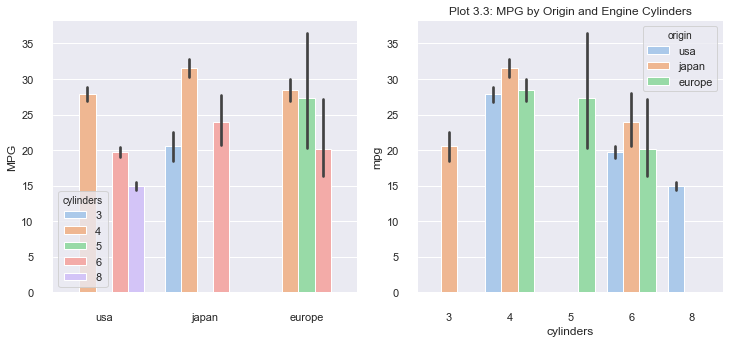

In [10]:
sns.set(style='darkgrid')

f, axes = plt.subplots(1,2, figsize=(12,5))

g = sns.barplot(x='origin', y='mpg', hue='cylinders', data=df, palette='pastel', ci=95, ax=axes[0])
h = sns.barplot(x='cylinders', y='mpg', hue='origin', data=df, palette='pastel', ci=95, ax=axes[1])

plt.title('Plot 3.3: MPG by Origin and Engine Cylinders')

sns.despine(offset=10, trim=True)
g.set(xlabel='', ylabel='MPG')

plt.show()

In plot 3.3 we get some of the same information as the previous plot, but it's _too_ simplified. We've lost some of the nuance. We can easily compare MPG over categories, such as MPG of four cylinder engies by origin of production. While it's helpful, it's too simple where plot 3.2 wasn't simple enough.

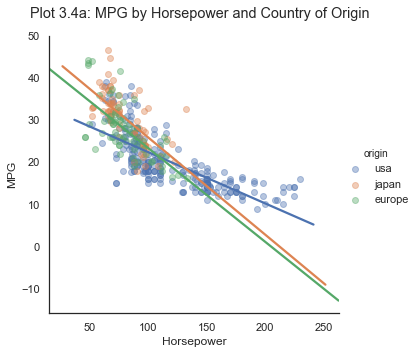

In [11]:
sns.set(style='white')

g = sns.lmplot(y='mpg',
              x='horsepower',
              hue='origin', 
              data=df,
              fit_reg=True,
              ci=False,
              scatter_kws={'alpha':0.4})

Title = 'Plot 3.4a: MPG by Horsepower and Country of Origin'
g.set(xlabel='Horsepower', ylabel='MPG')
plt.suptitle(Title)
plt.subplots_adjust(top=0.9)

plt.show()

In plot 3.4a we get a good idea of the relationship between horsepower and MPG, but it's not a very easy to read chart. Let's see if we can improve that...

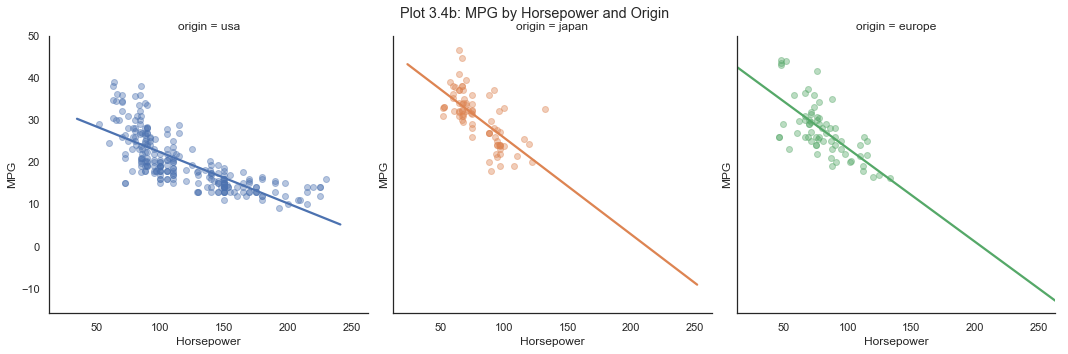

In [12]:
sns.set(style='white')

g = sns.lmplot(y='mpg',
              x='horsepower',
              hue='origin', 
              data=df,
              col='origin',
              fit_reg=True,
              ci=False,
              scatter_kws={'alpha':0.4})

Title = 'Plot 3.4b: MPG by Horsepower and Origin'
g.set(xlabel='Horsepower', ylabel='MPG')
plt.suptitle(Title)
plt.subplots_adjust(top=0.9)

plt.show()

Plot 3.3b is a much greater improvement. We can easily compare MPG and horsepower over the three categories of origin of production. We can see that they all have a similar correlation and we can see how dramatically they're correlated. One big difference between this chat and the previous, we also get a good sense of the sample size. In this data set, most of the data is on cars from the US. This could skew our results.

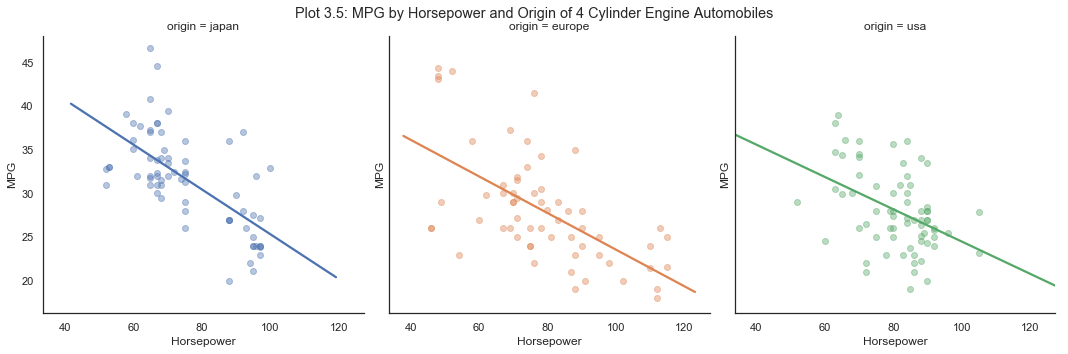

In [13]:
sns.set(style='white')

g = sns.lmplot(y='mpg',
              x='horsepower',
              hue='origin', 
              data=df.loc[(df['cylinders']==4)],
              col='origin',
              fit_reg=True,
              ci=False,
              scatter_kws={'alpha':0.4})
Title = 'Plot 3.5: MPG by Horsepower and Origin of 4 Cylinder Engine Automobiles'
g.set(xlabel='Horsepower', ylabel='MPG')
plt.suptitle(Title)
plt.subplots_adjust(top=0.9)
plt.show()

In plot 3.5 we get a very specifict, clear view of the performance of 4 cylinder cars based on their origin of production. We can easily compare each producer, how the MPG and horsepower are correlated, and see what the best performing automobiles are based on our criteria.

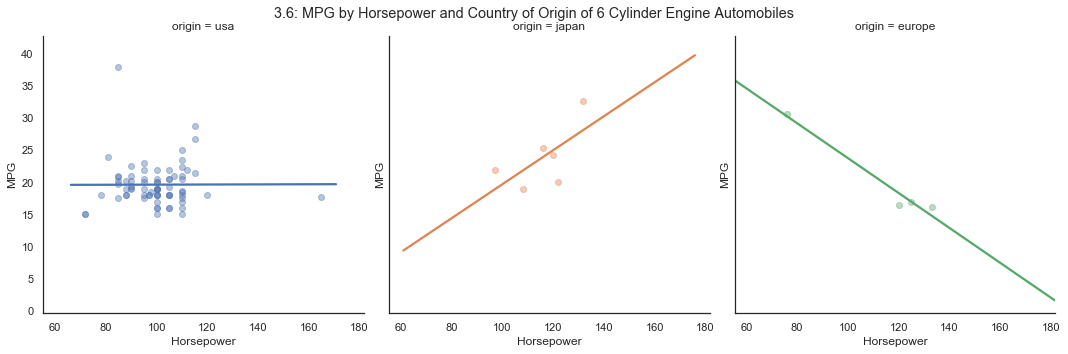

In [14]:
sns.set(style='white')

g = sns.lmplot(y='mpg',
              x='horsepower',
              hue='origin', 
              data=df.loc[(df['cylinders']==6)],
              col='origin',
              fit_reg=True,
              ci=False,
              scatter_kws={'alpha':0.4})
Title = '3.6: MPG by Horsepower and Country of Origin of 6 Cylinder Engine Automobiles'
g.set(xlabel='Horsepower', ylabel='MPG')
plt.suptitle(Title)
plt.subplots_adjust(top=0.9)
plt.show()

In plot 3.6 we get the same information as plot 3.5, but for 6 cylinder engines. We get the same information, but we can see that the data does not fit the plot nearly as well. Unlike plot 3.5, we don't get a great sense of our sample data and it's much harder to compare performance over the categories.